In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import shap
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import ExtraTreesClassifier
import pickle 
import numpy as np
# 将 np.bool 替换为 np.bool_
np.bool = np.bool_

E:\anaconda\envs\hyrenv2\Lib\site-packages\shap\utils\_clustering.py:34: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit
E:\anaconda\envs\hyrenv2\Lib\site-packages\shap\utils\_clustering.py:53: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit
E:\anaconda\envs\hyrenv2\Lib\site-packages\shap\utils\_clustering.py:62: NumbaDeprecationWarning: The 'nopython' key

In [12]:
# 加载预测数据集
data = pd.read_csv('18特征.csv')

In [13]:
import pickle# 加载训练好的ExtraTreeClassifier模型
model = ExtraTreesClassifier()
model = pickle.load(open("ET.dat","rb"))

Trying to unpickle estimator ExtraTreeClassifier from version 1.1.3 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
Trying to unpickle estimator ExtraTreesClassifier from version 1.1.3 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations


In [14]:
# 拟合模型
X = data.drop(columns=['Stability'])
y = data['Stability']


In [15]:
# 初始化 SHAP explainer
explainer = shap.Explainer(model, X)

# 计算 SHAP 值
shap_values = explainer(X)

In [16]:
# 将 shap 值转换为 pandas DataFrame
shap_df = pd.DataFrame(shap_values.values[:,:,1], columns=X.columns)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


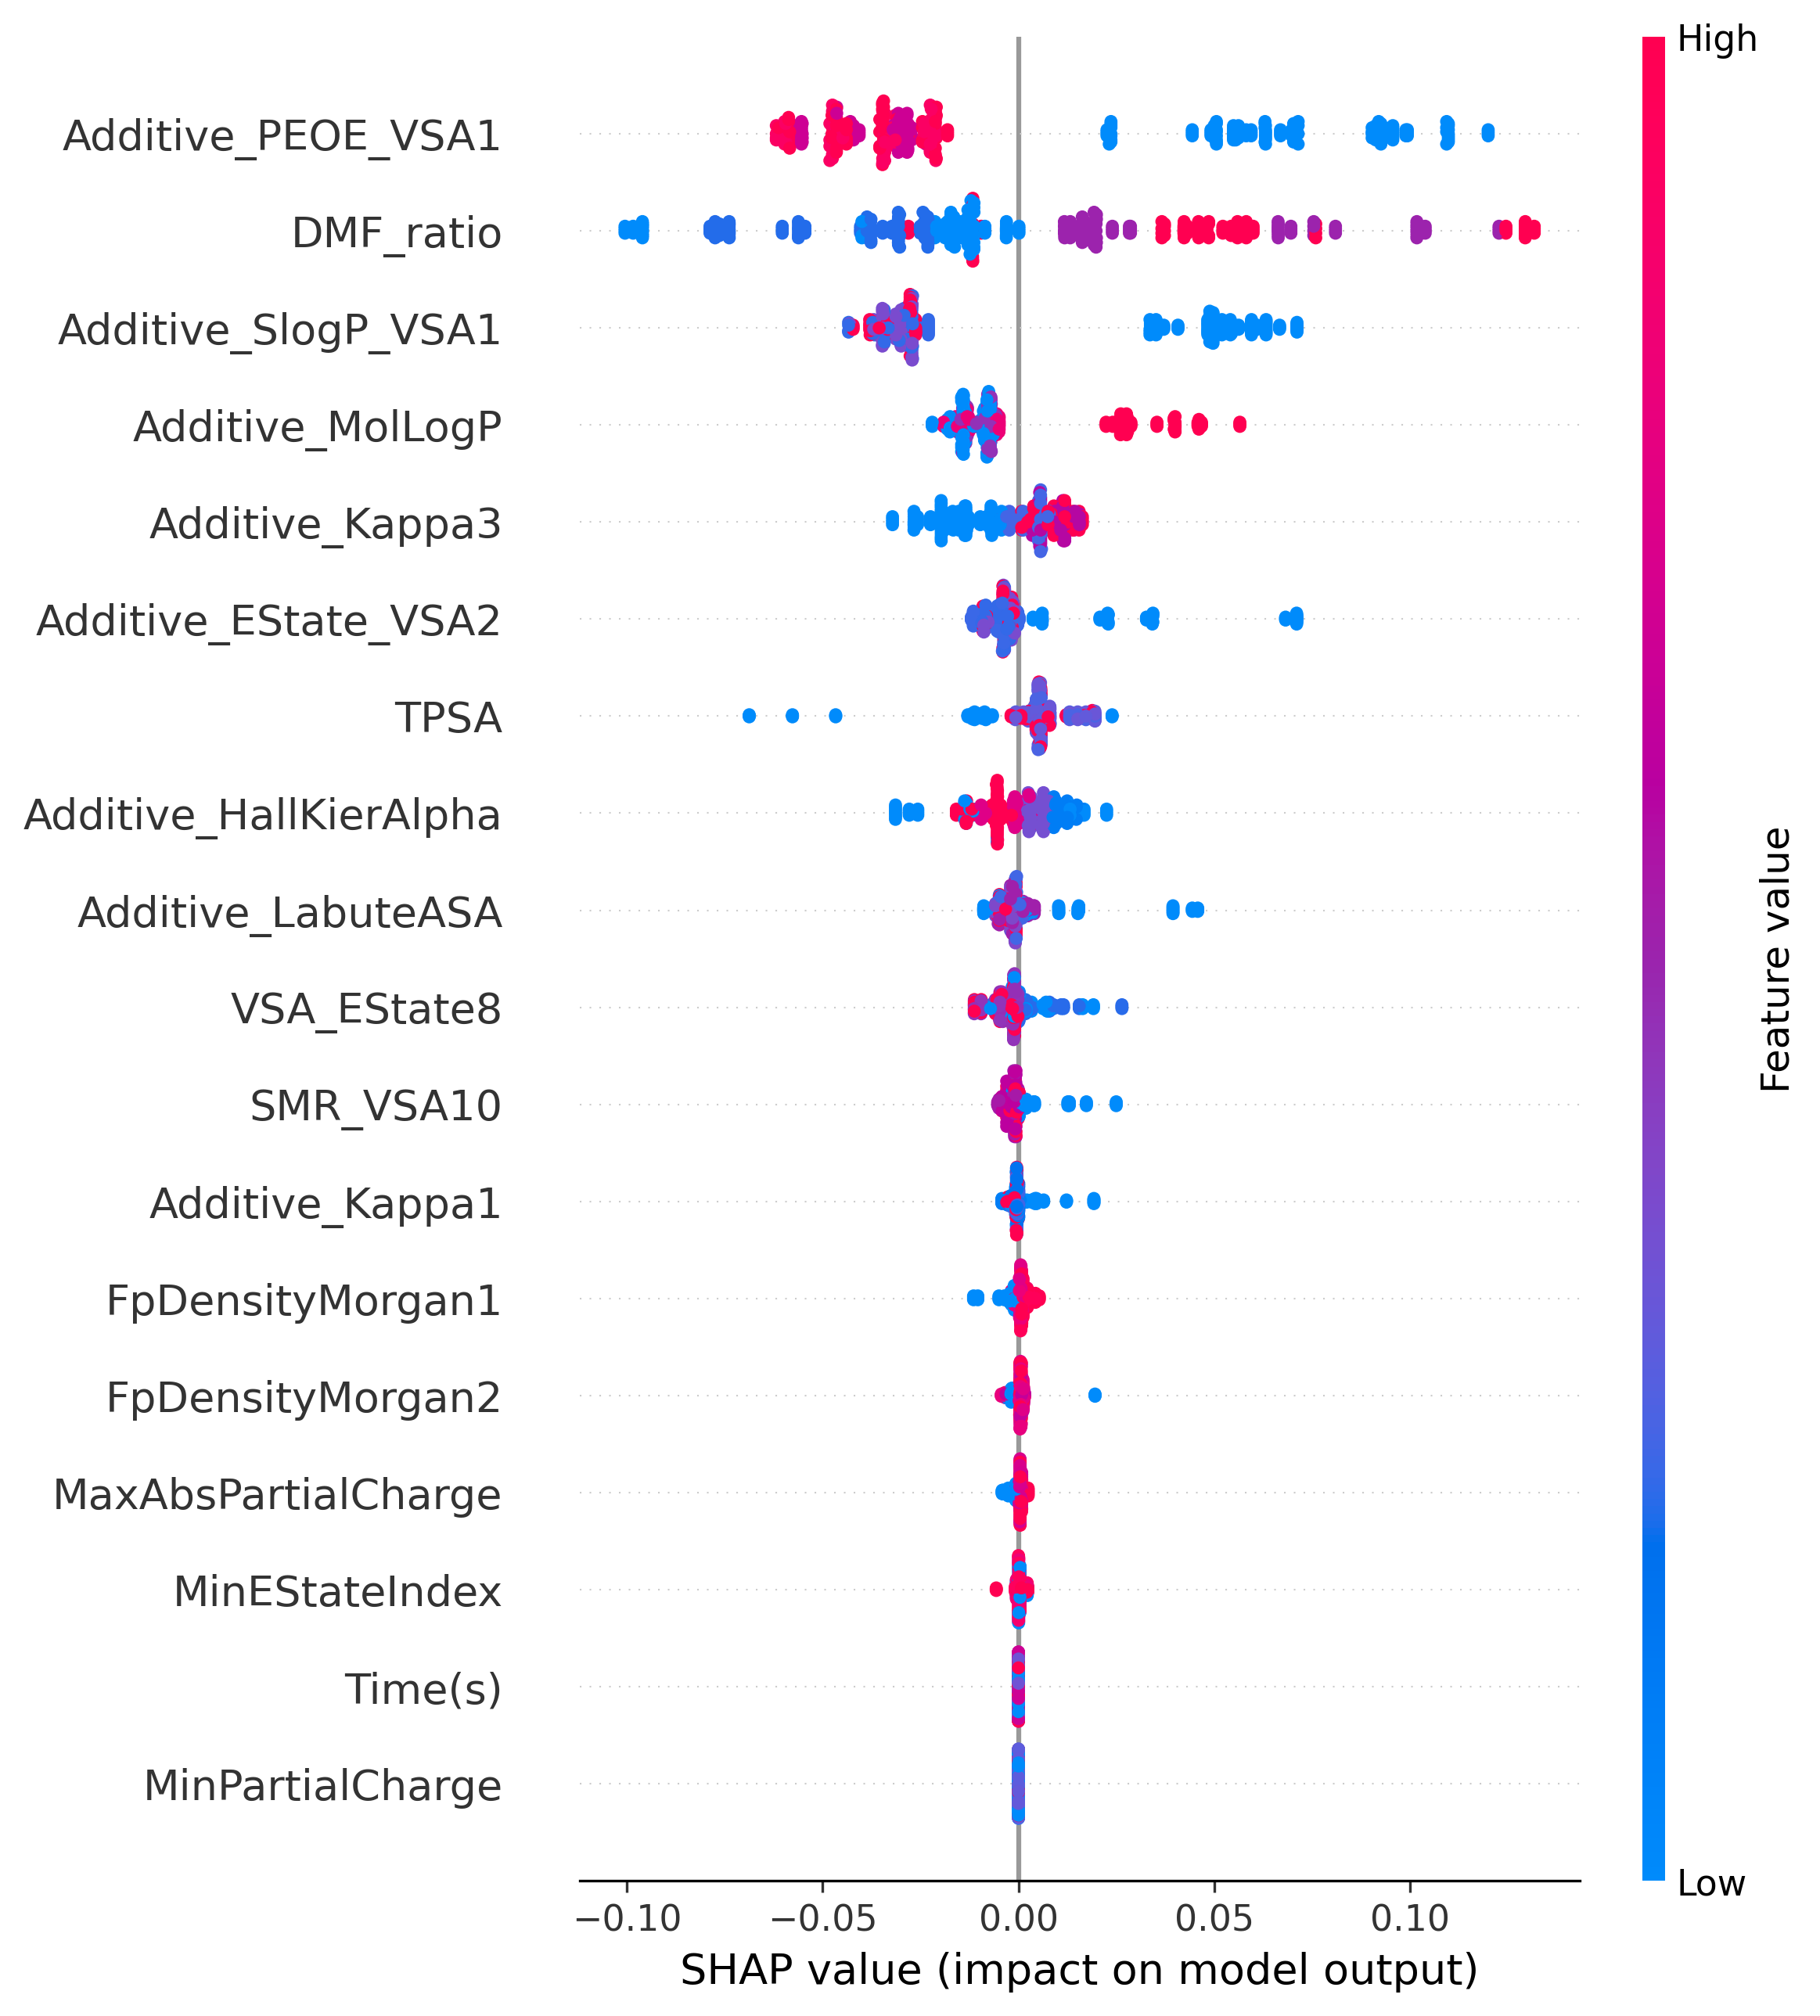

In [9]:
import matplotlib
matplotlib.use('TkAgg')
%matplotlib inline
import matplotlib
matplotlib.use('TkAgg')

# 绘制蜂群图
shap.summary_plot(shap_values.values[:,:,1], X, show=False, plot_type='dot')
plt.tight_layout()
plt.show()
# 保存图表为 .png 格式的文件
plt.savefig('summary_plot.png', format='png', dpi=300, bbox_inches='tight')

# 在笔记本中展示图像
from IPython.display import Image
display(Image('summary_plot.png'))

In [12]:
# 绘制第一个样本的活力图，绿色表示对目标分类的贡献，红色表示对其他分类的贡献
shap.force_plot(explainer.expected_value[1], shap_values.values[0,:,1], X.iloc[0,:], 
                matplotlib=True, show=False)
plt.tight_layout()
plt.savefig('活力图.jpg', bbox_inches='tight', dpi=3000)
plt.show()

In [14]:

import seaborn as sns
from sklearn.cluster import KMeans

# Perform clustering using KMeans algorithm
kmeans = KMeans(n_clusters=5, random_state=0).fit(shap_df)
sns.clustermap(shap_df, row_cluster=False, col_cluster=False, cmap='coolwarm', figsize=(40,40))
plt.savefig('热图.jpg', dpi=300)
plt.show()

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


In [15]:
# Perform clustering on features
feature_clustered = sns.clustermap(shap_df.T.corr(), cmap='coolwarm', figsize=(10,10))


# Display the plot
plt.savefig('聚类热图.jpg', dpi=300)
plt.show()

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
Clustering large matrix with scipy. Installing `fastcluster` may give better performance.


In [27]:
# 导入所需库
import matplotlib.pyplot as plt
from IPython.display import Image, display

# 绘制重要性排名柱状图
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(40,30))
sns.barplot(x=shap_mean_sorted.values, y=shap_mean_sorted.index, ax=ax)
ax.set_xlabel('Mean |SHAP| value', fontsize=5)
ax.set_title('Feature Importance Rankings', fontsize=48)
plt.tight_layout()

# 保存图表为 .png 格式的文件
fig.savefig('feature_importance.png', dpi=300)

# 在笔记本中展示图像
display(Image(filename='feature_importance.png'))

In [24]:
import graphviz
from sklearn.tree import export_graphviz
 # 将决策树导出为DOT格式
dot_data = export_graphviz(model.estimators_[0], out_file=None, 
                           feature_names=data.columns[:-1], class_names=['0', '1'],
                           filled=True, rounded=True,
                           special_characters=True)
# 将DOT格式转换为绘图
graph = graphviz.Source(dot_data)
import os
os.environ["PATH"] += os.pathsep + 'E:\anaconda\envs\hyrenv2\Lib\site-packages\graphviz'
# 展示决策树状图
graph.render('decision_tree', format='png')

'decision_tree.png'

Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from current font.
Glyph 24449 (\N{CJK UNIFIED IDEOGRAPH-5F81}) missing from current font.
Glyph 20132 (\N{CJK UNIFIED IDEOGRAPH-4EA4}) missing from current font.
Glyph 20114 (\N{CJK UNIFIED IDEOGRAPH-4E92}) missing from current font.
Glyph 24433 (\N{CJK UNIFIED IDEOGRAPH-5F71}) missing from current font.
Glyph 21709 (\N{CJK UNIFIED IDEOGRAPH-54CD}) missing from current font.
Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from current font.
Glyph 24449 (\N{CJK UNIFIED IDEOGRAPH-5F81}) missing from current font.
Glyph 20132 (\N{CJK UNIFIED IDEOGRAPH-4EA4}) missing from current font.
Glyph 20114 (\N{CJK UNIFIED IDEOGRAPH-4E92}) missing from current font.
Glyph 24433 (\N{CJK UNIFIED IDEOGRAPH-5F71}) missing from current font.
Glyph 21709 (\N{CJK UNIFIED IDEOGRAPH-54CD}) missing from current font.
Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from curren

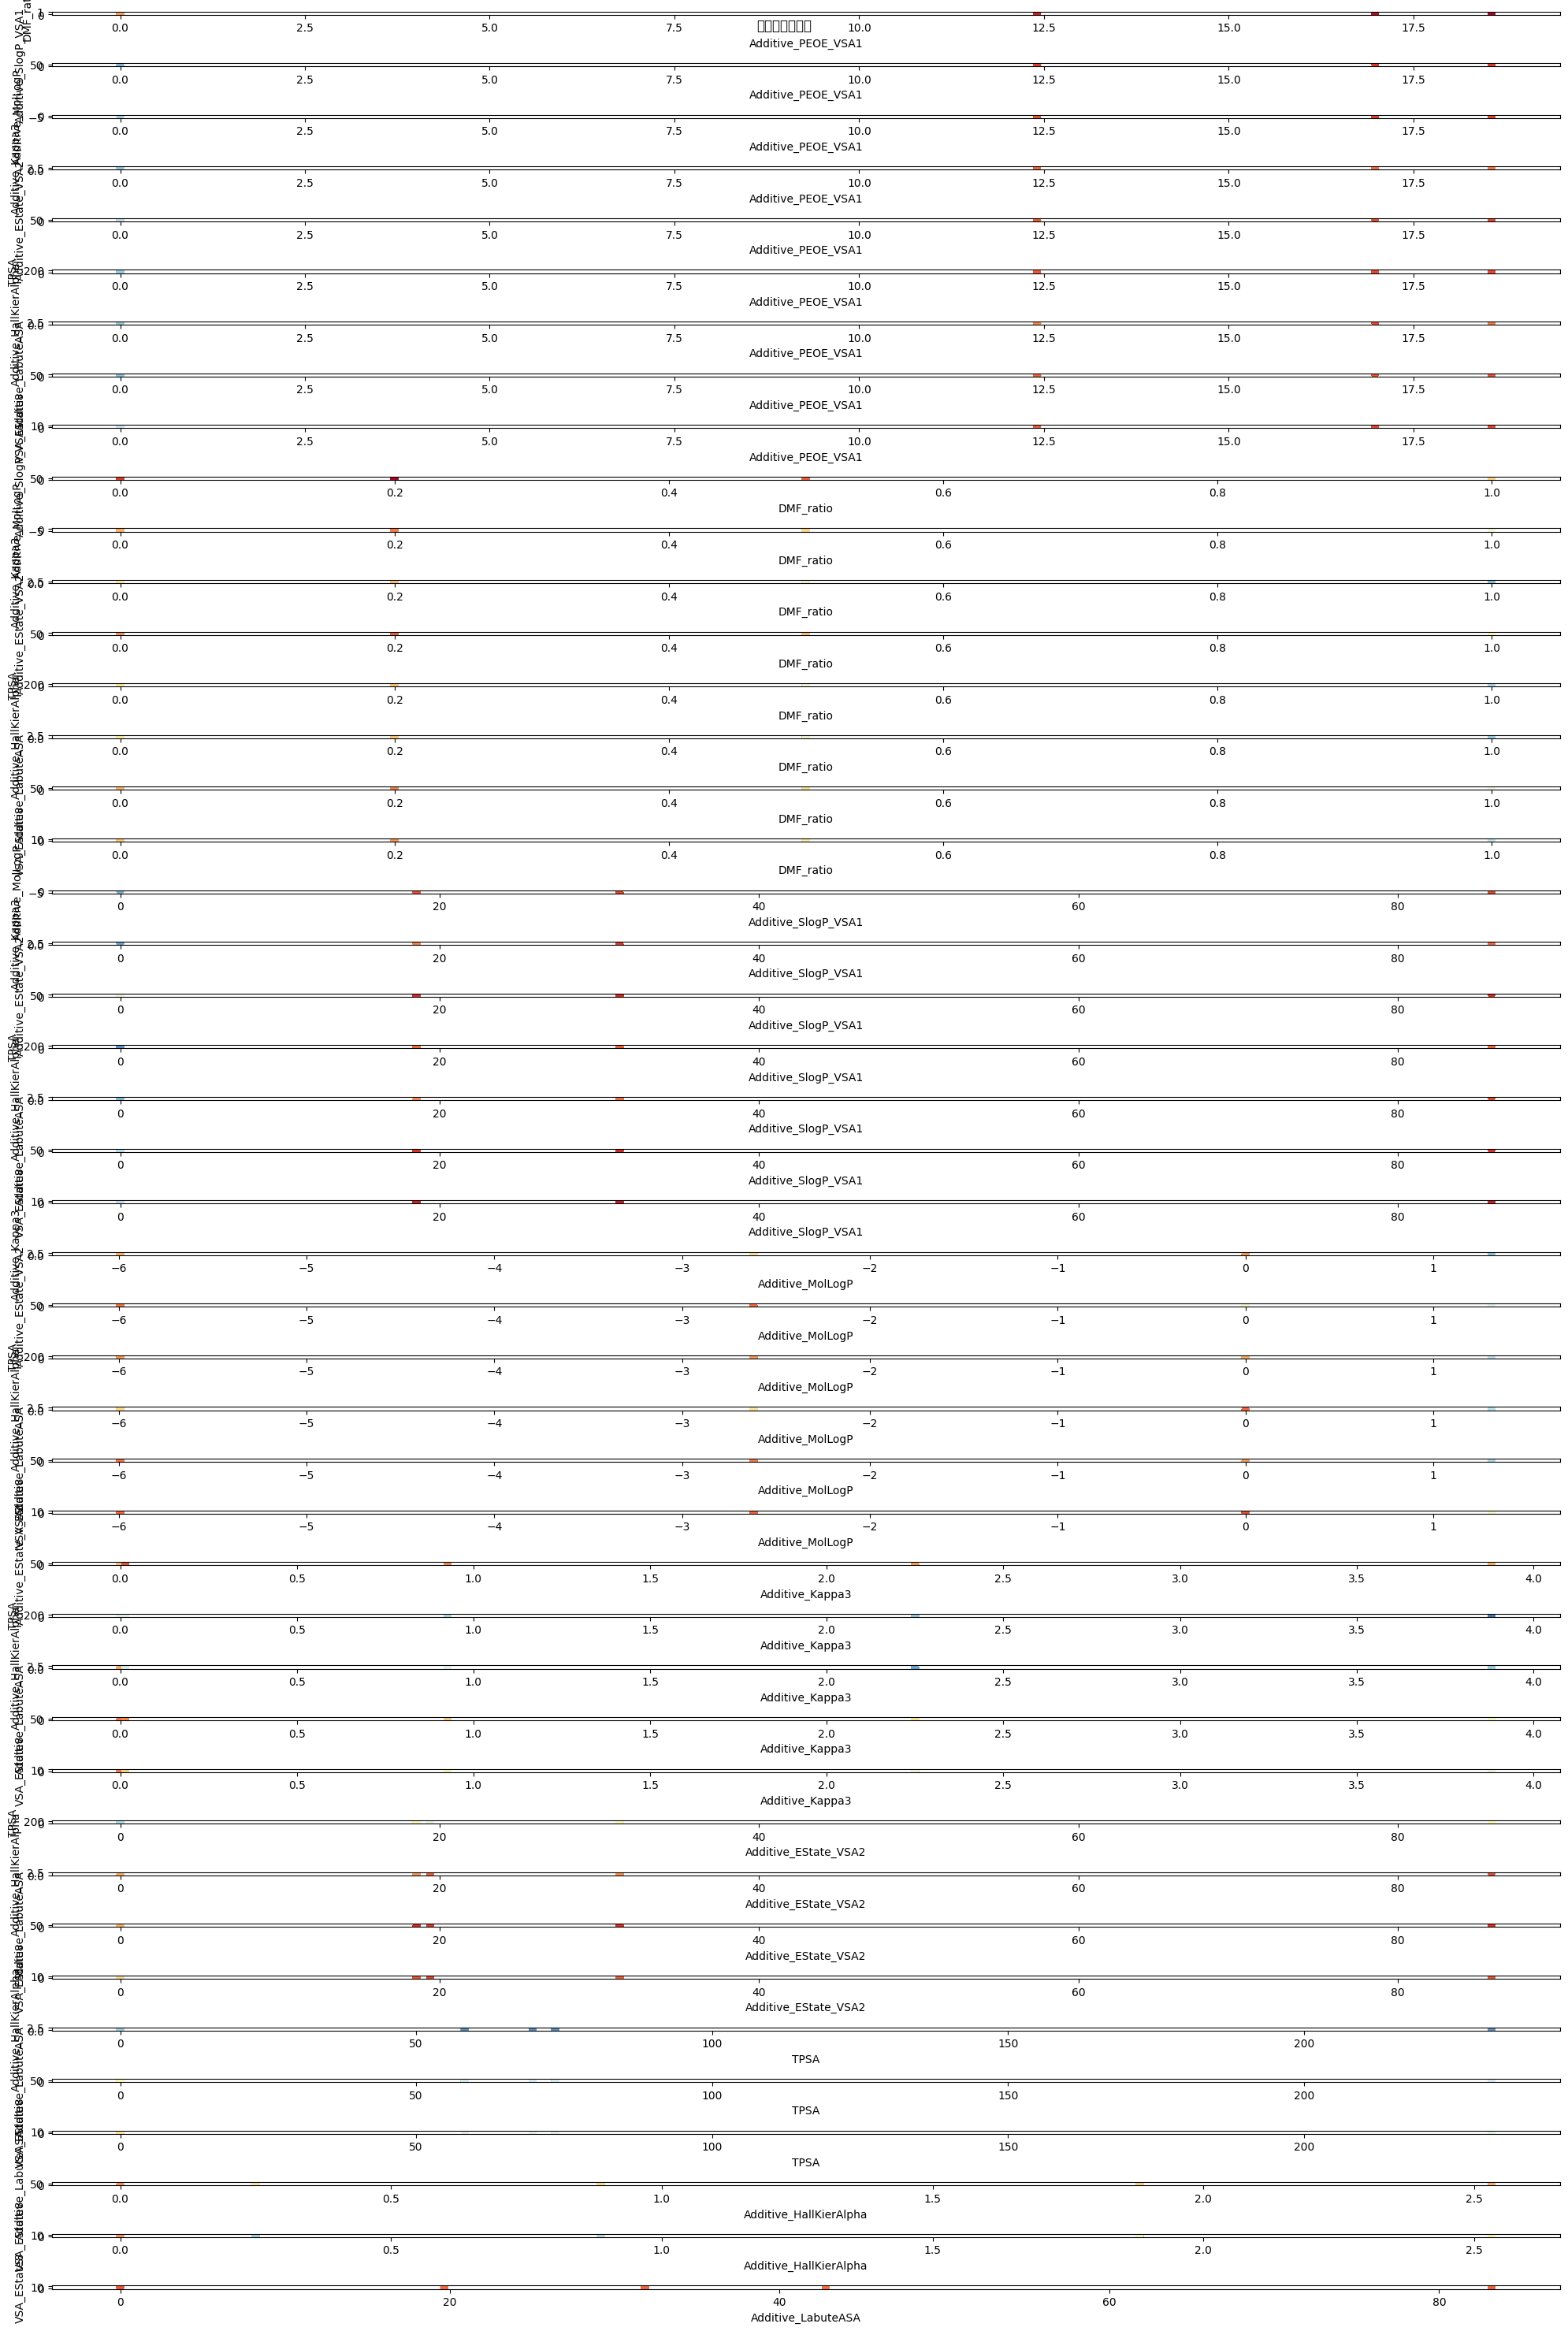

特征交互影响图展示了前10个特征之间的相互作用。每个子图中的散点图表示两个特征之间的交互关系。颜色越深表示对目标变量的影响越大。


In [21]:
import numpy as np
import itertools

# 使用笛卡尔积生成特征之间的交互组合
interactions = list(itertools.combinations(top_10_features, 2))

# 创建一个子图网格
fig, axes = plt.subplots(len(interactions), figsize=(20, 30))

# 绘制每个特征交互影响图
for i, interaction in enumerate(interactions):
    feature1, feature2 = interaction
    feature1_values = X[feature1]
    feature2_values = X[feature2]
    shap_vals = shap_df[[feature1, feature2]]

    # 转换为单个数值序列
    shap_vals_combined = shap_vals[feature1] + shap_vals[feature2]

    # 绘制散点图，并使用shap_vals_combined作为颜色参数
    axes[i].scatter(feature1_values, feature2_values, c=shap_vals_combined, cmap='RdYlBu', alpha=0.7)
    axes[i].set_xlabel(feature1)
    axes[i].set_ylabel(feature2)

# 添加标题和标签
fig.suptitle("特征交互影响图")
plt.tight_layout()

# 显示图像
plt.show()

# 中文说明
print("特征交互影响图展示了前10个特征之间的相互作用。每个子图中的散点图表示两个特征之间的交互关系。颜色越深表示对目标变量的影响越大。")

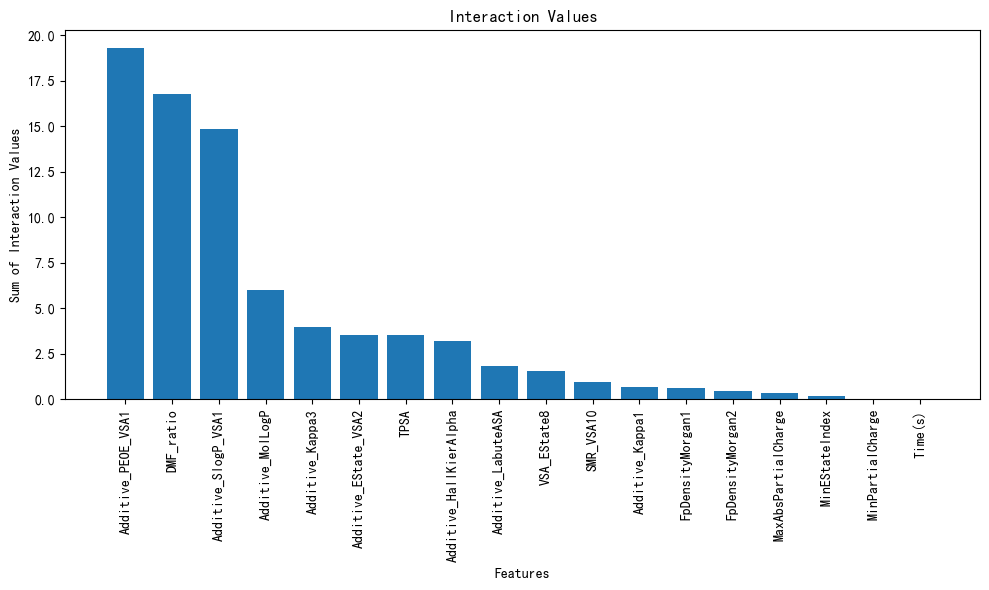

In [34]:
import matplotlib.pyplot as plt

# Calculate the Interaction Values
interaction_values = shap_df.abs().sum(axis=0)

# Sort the features based on their sum of interaction values
sorted_interaction_values = interaction_values.sort_values(ascending=False)

# Plot the Interaction Values
plt.figure(figsize=(10, 6))
plt.bar(sorted_interaction_values.index, sorted_interaction_values.values)
plt.title("Interaction Values")
plt.xlabel("Features")
plt.ylabel("Sum of Interaction Values")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

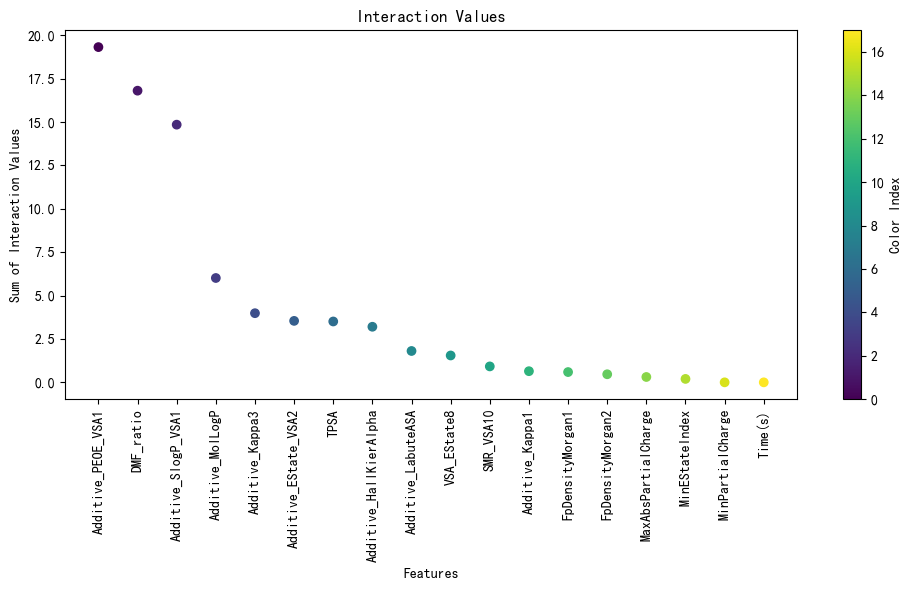

In [35]:
import numpy as np

# Calculate the Interaction Values
interaction_values = shap_df.abs().sum(axis=0)

# Sort the features based on their sum of interaction values
sorted_interaction_values = interaction_values.sort_values(ascending=False)

# Create a color map for the scatter plot
colors = np.array(range(len(sorted_interaction_values)))

# Plot the Interaction Values using a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(sorted_interaction_values.index, sorted_interaction_values.values, c=colors, cmap='viridis')
plt.title("Interaction Values")
plt.xlabel("Features")
plt.ylabel("Sum of Interaction Values")
plt.xticks(rotation=90)
plt.colorbar(label="Color Index")
plt.tight_layout()
plt.show()

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
FixedFormatter should only be used together with FixedLocator


AttributeError: 'Axes' object has no attribute 'colorbar'

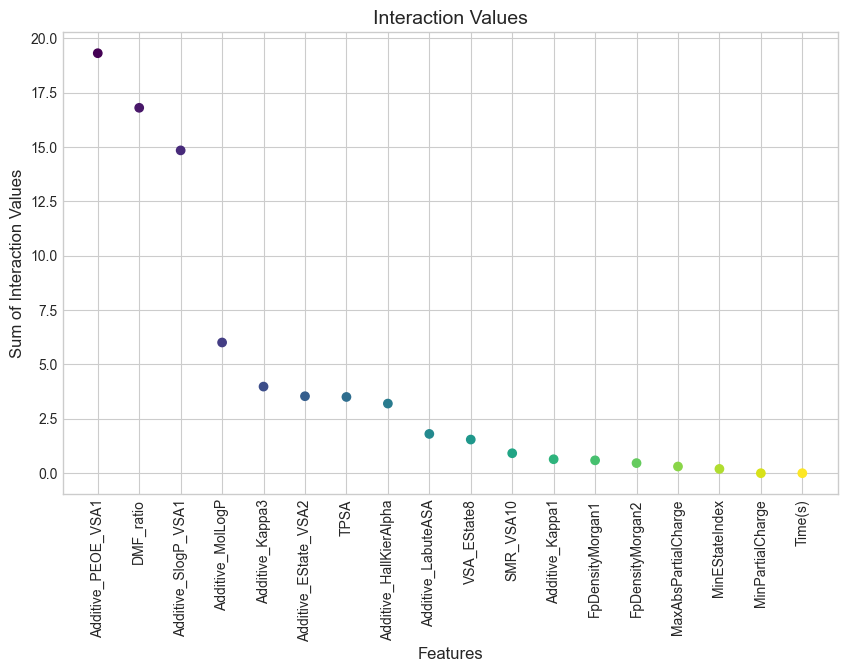

In [41]:
import numpy as np

# Calculate the Interaction Values
interaction_values = shap_df.abs().sum(axis=0)

# Sort the features based on their sum of interaction values
sorted_interaction_values = interaction_values.sort_values(ascending=False)

# Create a color map for the scatter plot
colors = np.array(range(len(sorted_interaction_values)))

# Set the style of the plot
plt.style.use('seaborn-whitegrid')

# Plot the Interaction Values using a scatter plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(sorted_interaction_values.index, sorted_interaction_values.values, c=colors, cmap='viridis')
ax.set_title("Interaction Values", fontsize=14)
ax.set_xlabel("Features", fontsize=12)
ax.set_ylabel("Sum of Interaction Values", fontsize=12)
ax.set_xticklabels(sorted_interaction_values.index, rotation=90, fontsize=10)
ax.colorbar(label="Color Index")
plt.tight_layout()

# Add a gradient background to the plot
ax.set_facecolor('#f2f2f2')

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add grid lines
ax.grid(color='white')

# Adjust the padding between the plot and the labels
plt.subplots_adjust(bottom=0.2)

# Show the plot
fig.savefig('交互影响.png', dpi=300)
plt.show()